In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats as sp  


In [40]:
datos = np.array([8,5,9,8,5,2,4,8,12,58,69,47,58,96,32,65,89,47,51,25,56,32,28,89,94,96,95,9])

In [41]:
print(datos)

[ 8  5  9  8  5  2  4  8 12 58 69 47 58 96 32 65 89 47 51 25 56 32 28 89
 94 96 95  9]


In [42]:
print(datos.std())
print(datos.mean())

33.197057743980004
42.75


In [43]:
## FUNCIÓN MEDIA
def media(valores):
    resultado = sum(valores)/len(valores)
    return resultado

In [44]:
##FUNCIÓN DESVIACIÓN ESTÁNDAR
def des_estandar(valores):
    import math
    calculo = []
    for i in valores:
        calculo.append((i-media(valores))**2)
    suma = sum(calculo)
    resultado = math.sqrt(suma/len(valores))
    return resultado

In [45]:
## FUNCIÓN COEFICIENTE DE ASIMETRÍA
def cof_corre(valores):
    calculo = []
    for i in valores:
        calculo.append((i-media(valores))**3)
    suma= sum(calculo)
    resultado = suma/((len(valores)*(des_estandar(valores)**3)))
    return resultado

In [46]:
## FUNCIÓN CURTOSIS
def curtosis(valores):
    calculo = []
    for i in valores:
        calculo.append((i-media(valores))**4)
    suma = sum(calculo)
    resultado = (suma/((len(valores)*(des_estandar(valores)**4))))-3
    return resultado

In [64]:
#ALGORITMO PRUEBA DE NORMALIDAD
def prueba_normalidad(valores):
    
    #FUNCIÓN MEDIA
    def media(valores):
        resultado = sum(valores)/len(valores)
        return resultado

    #FUNCIÓN DESVIACIÓN ESTÁNDAR
    def des_estandar(valores):
        import math
        calculo = []
        for i in valores:
            calculo.append((i-media(valores))**2)
        suma = sum(calculo)
        resultado = math.sqrt(suma/len(valores))
        return resultado

    #FUNCIÓN COEFICIENTE DE ASIMETRÍA
    def cof_corre(valores):
        calculo = []
        for i in valores:
            calculo.append((i-media(valores))**3)
        suma= sum(calculo)
        resultado = suma/((len(valores)*(des_estandar(valores)**3)))
        return resultado

    #FUNCIÓN CURTOSIS
    def curtosis(valores):
        calculo = []
        for i in valores:
            calculo.append((i-media(valores))**4)
        suma = sum(calculo)
        resultado = (suma/((len(valores)*(des_estandar(valores)**4))))
        return resultado
    
    rmedia = str(media(valores))
    rdesviación = str(des_estandar(valores))
    rcoefi = str(cof_corre(valores))
    vacurtosis = curtosis(valores)
    curtosistexto=""
    vacoefi = cof_corre(valores)
    coefitexto=""
    rcurtosis = str(curtosis(valores))
    valorMax = str(max(valores))
    valorMin = str(min(valores))
    
    if(vacoefi) == 0:
        coefitexto = "La distribución es perfectamente simétrica respecto a la media"
    elif (vacoefi) >0:
        coefitexto = "La distribución está sesgada a la derecha"
    else:
        coefitexto = "La distribución está sesgada a la izquierda"
        
    
    if(vacurtosis) == 3:
        curtosistexto = "La distribución es perfectamente normal"
    elif(vacurtosis) > 3:
        curtosistexto = "Los valores de la distribución están concentrados respecto a la media"
    else:
        curtosistexto = "Muchos valores de la distribución alejados de la media, tenemos el fenómeno de las colas gruesas"
    
    
    print("El número de datos es: ", len(valores))
    print("El valor máximo de la serie de datos es: ", valorMax[:7])
    print("El valor mínimo de la serie de datos es: ", valorMin[:7])
    print("La media de los valores es: ", rmedia[:5])
    print("La desviación estándar de los valores es: ", rdesviación[:7])
    print("El coeficiente de asimetría de los valores es: ", rcoefi[:7])
    print(coefitexto)
    print("La curtosis de los valores es: ", rcurtosis[:8])
    print(curtosistexto)
   

In [65]:
prueba_normalidad(datos)

El número de datos es:  3633
El valor máximo de la serie de datos es:  195.600
El valor mínimo de la serie de datos es:  68.1100
La media de los valores es:  125.7
La desviación estándar de los valores es:  23.4692
El coeficiente de asimetría de los valores es:  0.40096
La distribución está sesgada a la derecha
La curtosis de los valores es:  3.197279
Los valores de la distribución están concentrados respecto a la media


In [49]:
import pandas_datareader as pdr

In [50]:
df = pdr.DataReader("SPY", "yahoo", "20000101", "20140612")


In [51]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,148.25000,143.875000,148.25000,145.4375,8164300.0,99.394493
2000-01-04,144.06250,139.640625,143.53125,139.7500,8089800.0,95.507530
2000-01-05,141.53125,137.250000,139.93750,140.0000,12177900.0,95.678391
2000-01-06,141.50000,137.750000,139.62500,137.7500,6227200.0,94.140717
2000-01-07,145.75000,140.062500,140.31250,145.7500,8066500.0,99.608055


In [52]:
df = df["Close"]   #extreamos del dataframe la columna del precio de cierre que es la que nos interesa

In [53]:
df.head()

Date
2000-01-03    145.4375
2000-01-04    139.7500
2000-01-05    140.0000
2000-01-06    137.7500
2000-01-07    145.7500
Name: Close, dtype: float64

In [54]:
len(df)

3633

In [55]:
datos = df.to_numpy()   #trasformamos el data frame en un array para poder aplicar la funcion

In [56]:
type(datos)

numpy.ndarray

In [58]:
len(datos)

3633

In [59]:
prueba_normalidad(datos)

La media de los valores es:  125.7
La desviación estándar de los valores es:  23.4692
El coeficiente de asimetría de los valores es:  0.40096
La distribución está sesgada a la derecha
La curtosis de los valores es:  0.197279
Muchos valores de la distribución alejados de la media, tenemos el fenómeno de las colas gruesas
El valor máximo de la serie de datos es:  195.600
El valor mínimo de la serie de datos es:  68.1100


In [66]:
def graficar(valores, eje_x, eje_y, titulo):
    
    #FUNCIÓN CON LOS PARÁMETROS MÁS BÁSICOS PARA GRAFICAR DIRECTAMENTE
    plt.plot(valores)
    plt.xlabel(eje_x)
    plt.ylabel(eje_y)
    plt.title(titulo)
    plt.show()
    

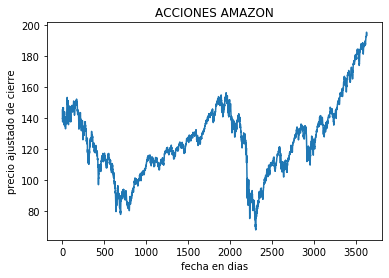

In [67]:
graficar(datos, "fecha en dias", "precio ajustado de cierre", "ACCIONES AMAZON")